In [1]:
import pandas as pd

In [2]:
songs = pd.read_json("StreamingHistory0.json")

songs["endTime"] = pd.to_datetime(songs["endTime"])

print(songs.shape)
songs.head()

(100, 4)


,endTime,artistName,trackName,msPlayed
0,2020-11-22 20:24:00,Bill Evans,Peace Piece,320470
1,2020-11-30 02:35:00,Bill Evans,Someday My Prince Will Come,311622
2,2020-12-15 02:15:00,Thelonious Monk,Epistrophy,67495
3,2020-12-21 18:59:00,Miles Davis,Flamenco Sketches,299240
4,2020-12-30 04:14:00,Bill Evans,My Foolish Heart,399126


In [3]:
songs.dtypes

endTime       datetime64[ns]
artistName            object
trackName             object
msPlayed               int64
dtype: object

In [4]:
songs["artistName"].nunique()

5

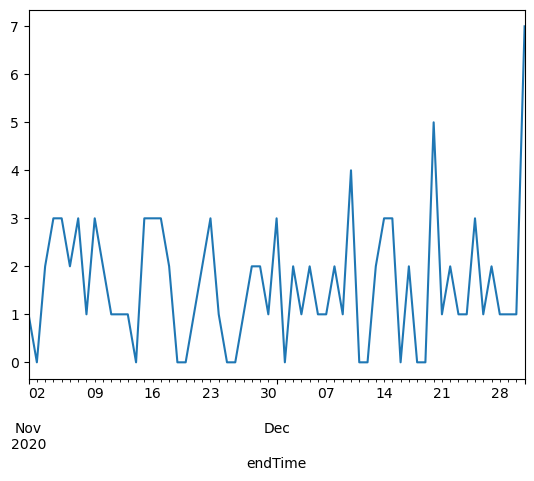

In [6]:
songs.set_index("endTime").resample("D").size().plot();

In [12]:
songs["minutesPlayed"] = ((songs["msPlayed"] / 1000) / 60)
songs.head()

,endTime,artistName,trackName,msPlayed,minutesPlayed
0,2020-11-22 20:24:00,Bill Evans,Peace Piece,320470,5.341167
1,2020-11-30 02:35:00,Bill Evans,Someday My Prince Will Come,311622,5.193700
2,2020-12-15 02:15:00,Thelonious Monk,Epistrophy,67495,1.124917
3,2020-12-21 18:59:00,Miles Davis,Flamenco Sketches,299240,4.987333
4,2020-12-30 04:14:00,Bill Evans,My Foolish Heart,399126,6.652100


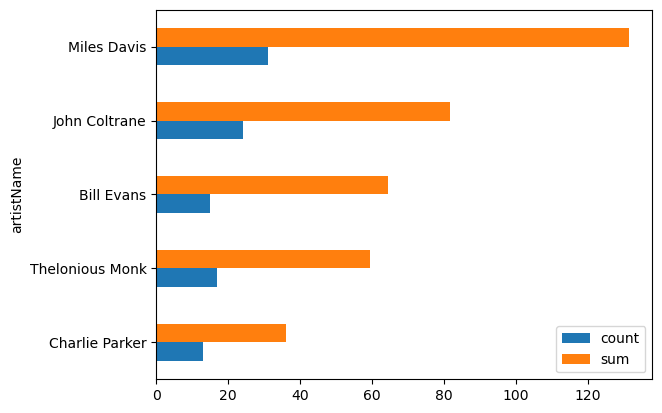

In [16]:
songs.groupby("artistName")["minutesPlayed"].agg(["count", "sum"]).sort_values("sum").plot.barh();

## Calculate stuff for Spotify Wrapped

- total listening time

In [18]:
total_ms = songs["msPlayed"].sum()
total_mins = ((total_ms/1000)/60)
total_hours = total_mins / 60
print(f"{total_mins=} {total_hours=}")

total_mins=372.7776666666667 total_hours=6.212961111111111


- Longest listening day

In [41]:
by_day = songs.set_index("endTime").resample("D")["msPlayed"].sum()
by_day_sorted = by_day.sort_values(ascending=False)
top_day = by_day_sorted.index[0]
top_day_mins = (by_day_sorted.values[0]/1000)/60

print(f"{top_day=} {top_day_mins=:.2f}")

top_day=Timestamp('2020-12-31 00:00:00') top_day_mins=24.28


In [30]:
top_day_str = f'{top_day.strftime("%A %d %B %Y")} ({top_day_count} plays)'
top_day_str

'Thursday 31 December 2020 (7 plays)'

- Top 5 artists

In [31]:
songs["artistName"].value_counts().head()

artistName
Miles Davis        31
John Coltrane      24
Thelonious Monk    17
Bill Evans         15
Charlie Parker     13
Name: count, dtype: int64

- Top played song (N times)

In [36]:
songs["song_display_name"] = songs.apply(lambda row: f'{row["trackName"]} ({row["artistName"]})', axis=1)
songs.head()

,endTime,artistName,trackName,msPlayed,minutesPlayed,song_display_name
0,2020-11-22 20:24:00,Bill Evans,Peace Piece,320470,5.341167,Peace Piece (Bill Evans)
1,2020-11-30 02:35:00,Bill Evans,Someday My Prince Will Come,311622,5.193700,Someday My Prince Will Come (Bill Evans)
2,2020-12-15 02:15:00,Thelonious Monk,Epistrophy,67495,1.124917,Epistrophy (Thelonious Monk)
3,2020-12-21 18:59:00,Miles Davis,Flamenco Sketches,299240,4.987333,Flamenco Sketches (Miles Davis)
4,2020-12-30 04:14:00,Bill Evans,My Foolish Heart,399126,6.652100,My Foolish Heart (Bill Evans)


In [37]:
songs["song_display_name"].value_counts().head()

song_display_name
All Blues (Miles Davis)            10
Naima (John Coltrane)               8
Blue in Green (Miles Davis)         8
Flamenco Sketches (Miles Davis)     6
Giant Steps (John Coltrane)         5
Name: count, dtype: int64